In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia=SentimentIntensityAnalyzer()

res={}

# Claculating polarity score of each row in dataframe
for i,row in tqdm(df.iterrows(), total=len(df)):
    text=row["text_"]
    res[text]=sia.polarity_scores(text)

vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'text_'})

vaders= vaders.merge(df, how='left')

vaders.head(20)

In [23]:
vaders.to_csv('review_sentiments_dataset.csv', index=False)

<Axes: xlabel='rating', ylabel='compound'>

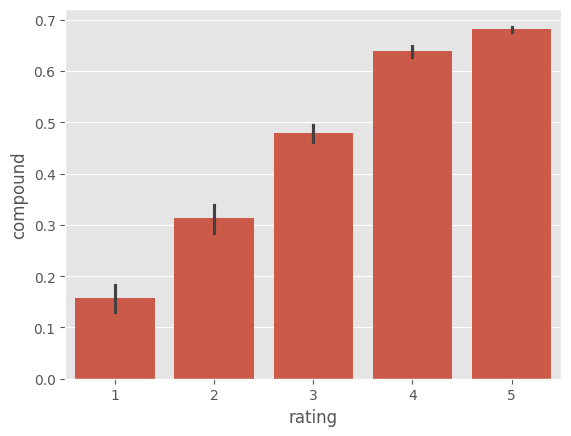

In [19]:
sns.barplot(data=vaders, x='rating', y='compound')

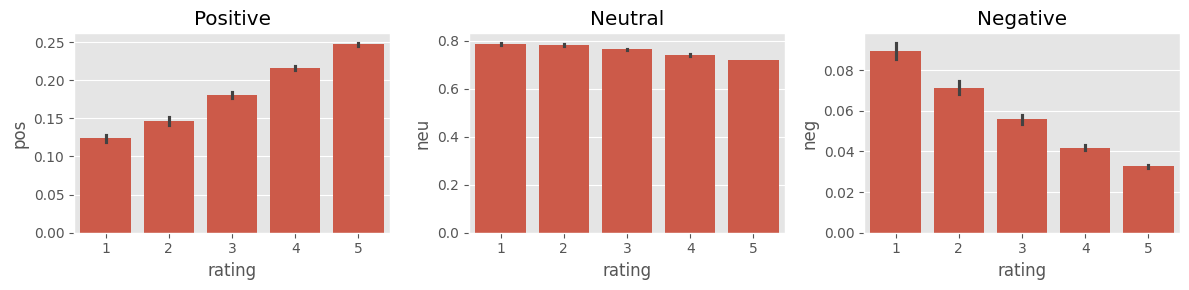

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()